In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("telcochurndata.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(len(data))

7043


In [4]:
data_org= data.copy()

In [5]:
data= data.drop(columns="customerID")

In [6]:
data.nunique().sort_values()


gender                 2
PaperlessBilling       2
PhoneService           2
Churn                  2
Partner                2
SeniorCitizen          2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
OnlineBackup           3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
dtype: int64

In [7]:
data["gender"]= data['gender'].map({"Male": 0, "Female": 1})

In [8]:
data['PaperlessBilling']= data['PaperlessBilling'].map({'Yes':1, 'No':0})

In [9]:
data['PhoneService']= data['PhoneService'].map({'Yes':1, 'No':0})

In [10]:
data['Churn']= data['Churn'].map({'Yes':1, 'No':0})

In [11]:
data['Partner']= data['Partner'].map({'Yes':1, 'No':0})

In [12]:
data['Dependents']= data['Dependents'].map({'Yes':1, 'No':0})

In [13]:
data["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [14]:
cols_to_encode=["MultipleLines","InternetService","OnlineSecurity", "DeviceProtection",'TechSupport','StreamingTV','StreamingMovies','Contract', 'OnlineBackup',"PaymentMethod"]

In [15]:
encoded_data= pd.get_dummies(data, columns=cols_to_encode, drop_first=True)

In [16]:
encoded_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,OnlineBackup_No internet service,OnlineBackup_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,True,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.5,0,...,False,False,False,True,False,False,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,True,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,True,False,False,False,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.5,0,...,True,False,True,True,False,False,False,False,False,True
7039,1,0,1,1,72,1,1,103.20,7362.9,0,...,True,False,True,True,False,False,True,True,False,False
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,74.40,306.6,1,...,False,False,False,False,False,False,False,False,False,True


In [17]:
encoded_data[encoded_data.columns.difference(data.columns)]= encoded_data[encoded_data.columns.difference(data.columns)].astype(int)

In [18]:
encoded_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,OnlineBackup_No internet service,OnlineBackup_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.5,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.5,0,...,1,0,1,1,0,0,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.9,0,...,1,0,1,1,0,0,1,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.6,1,...,0,0,0,0,0,0,0,0,0,1


In [19]:
rows_to_drop= encoded_data[encoded_data['TotalCharges']== ' '].index

In [20]:
encoded_data= encoded_data.drop(rows_to_drop)

In [21]:
encoded_data['TotalCharges']= encoded_data['TotalCharges'].astype(float)

In [23]:
correlation= encoded_data.corr()
churncorr= correlation['Churn'].sort_values(ascending= False)
print(churncorr)

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender                                   0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


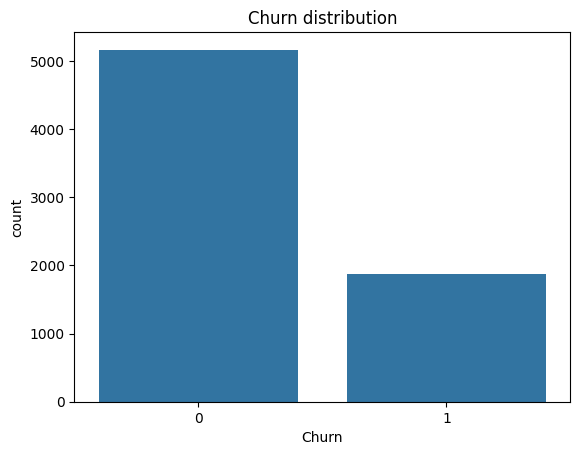

In [24]:
sns.countplot(x='Churn', data= encoded_data)
plt.title("Churn distribution")
plt.show()

In [25]:
print(encoded_data['Churn'].value_counts(normalize=True))

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


In [26]:
encoded_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,OnlineBackup_No internet service,OnlineBackup_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,1,0,0,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,1,0,1,1,0,0,1,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


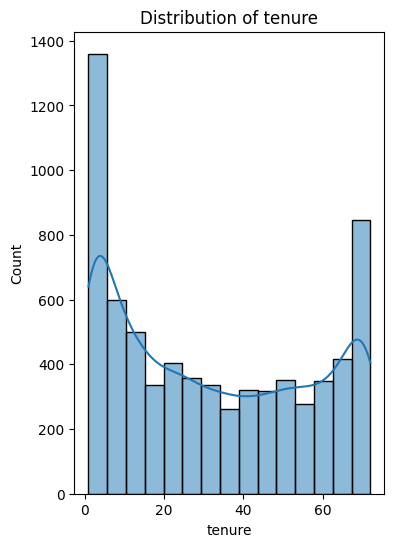

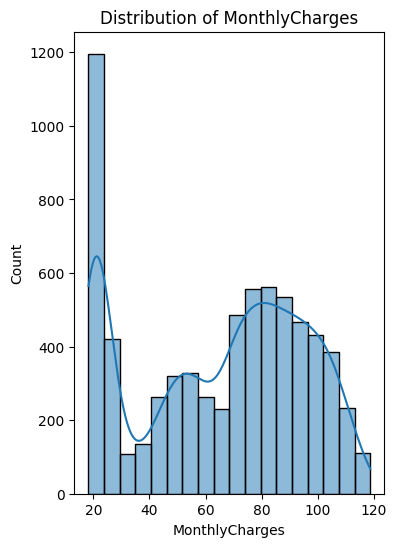

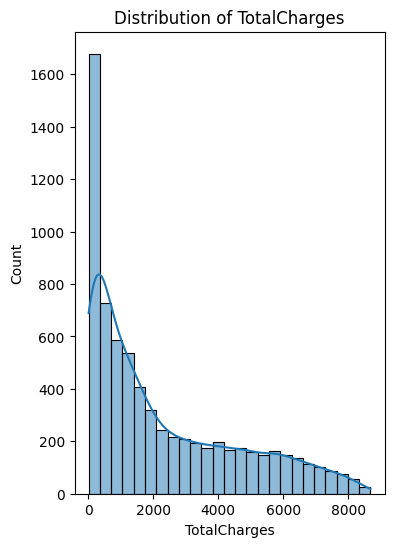

In [27]:
num_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(4,6))
    sns.histplot(encoded_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [28]:
print(encoded_data.columns.values)

['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'PaperlessBilling' 'MonthlyCharges' 'TotalCharges' 'Churn'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No internet service' 'StreamingMovies_Yes'
 'Contract_One year' 'Contract_Two year'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


In [29]:
'''
cat_cols= [col for col in encode_data.column if encoded_data[col].nunique==2 and col != target]
for col in cat_cols:
    plt.figure(figsize=(6,7))
    sns.countplot(x=col, hue='Churn', data=encoded_data)
    plt.xticks(rotation= 45)
    plt.title("count plot cat and churn")
    plt.tight_layout()
    plt.show()'''

'\ncat_cols= [col for col in encode_data.column if encoded_data[col].nunique==2 and col != target]\nfor col in cat_cols:\n    plt.figure(figsize=(6,7))\n    sns.countplot(x=col, hue=\'Churn\', data=encoded_data)\n    plt.xticks(rotation= 45)\n    plt.title("count plot cat and churn")\n    plt.tight_layout()\n    plt.show()'

In [30]:
def categorical_churn_summary(df, target= "Churn"):
    cat_col= [col for col in df.columns if df[col].nunique()==2 and col != target ]

    for col in cat_col:
        print(f"\n {col} : {target}")
        ctab= pd.crosstab(df[col], df[target], normalize= 'index' )*100
        display(ctab.style.background_gradient(cmap='coolwarm').format("{:.2f}"))
        


In [32]:
categorical_churn_summary(encoded_data)


 gender : Churn


Churn,0,1
gender,,
0,73.80,26.20
1,73.04,26.96



 SeniorCitizen : Churn


Churn,0,1
SeniorCitizen,,
0,76.35,23.65
1,58.32,41.68



 Partner : Churn


Churn,0,1
Partner,,
0,67.02,32.98
1,80.28,19.72



 Dependents : Churn


Churn,0,1
Dependents,,
0,68.72,31.28
1,84.47,15.53



 PhoneService : Churn


Churn,0,1
PhoneService,,
0,75.00,25.00
1,73.25,26.75



 PaperlessBilling : Churn


Churn,0,1
PaperlessBilling,,
0,83.62,16.38
1,66.41,33.59



 MultipleLines_No phone service : Churn


Churn,0,1
MultipleLines_No phone service,,
0,73.25,26.75
1,75.00,25.00



 MultipleLines_Yes : Churn


Churn,0,1
MultipleLines_Yes,,
0,74.93,25.07
1,71.35,28.65



 InternetService_Fiber optic : Churn


Churn,0,1
InternetService_Fiber optic,,
0,85.47,14.53
1,58.11,41.89



 InternetService_No : Churn


Churn,0,1
InternetService_No,,
0,68.14,31.86
1,92.57,7.43



 OnlineSecurity_No internet service : Churn


Churn,0,1
OnlineSecurity_No internet service,,
0,68.14,31.86
1,92.57,7.43



 OnlineSecurity_Yes : Churn


Churn,0,1
OnlineSecurity_Yes,,
0,68.63,31.37
1,85.36,14.64



 DeviceProtection_No internet service : Churn


Churn,0,1
DeviceProtection_No internet service,,
0,68.14,31.86
1,92.57,7.43



 DeviceProtection_Yes : Churn


Churn,0,1
DeviceProtection_Yes,,
0,71.30,28.70
1,77.46,22.54



 TechSupport_No internet service : Churn


Churn,0,1
TechSupport_No internet service,,
0,68.14,31.86
1,92.57,7.43



 TechSupport_Yes : Churn


Churn,0,1
TechSupport_Yes,,
0,68.77,31.23
1,84.80,15.20



 StreamingTV_No internet service : Churn


Churn,0,1
StreamingTV_No internet service,,
0,68.14,31.86
1,92.57,7.43



 StreamingTV_Yes : Churn


Churn,0,1
StreamingTV_Yes,,
0,75.63,24.37
1,69.89,30.11



 StreamingMovies_No internet service : Churn


Churn,0,1
StreamingMovies_No internet service,,
0,68.14,31.86
1,92.57,7.43



 StreamingMovies_Yes : Churn


Churn,0,1
StreamingMovies_Yes,,
0,75.56,24.44
1,70.05,29.95



 Contract_One year : Churn


Churn,0,1
Contract_One year,,
0,69.37,30.63
1,88.72,11.28



 Contract_Two year : Churn


Churn,0,1
Contract_Two year,,
0,65.94,34.06
1,97.15,2.85



 OnlineBackup_No internet service : Churn


Churn,0,1
OnlineBackup_No internet service,,
0,68.14,31.86
1,92.57,7.43



 OnlineBackup_Yes : Churn


Churn,0,1
OnlineBackup_Yes,,
0,70.78,29.22
1,78.43,21.57



 PaymentMethod_Credit card (automatic) : Churn


Churn,0,1
PaymentMethod_Credit card (automatic),,
0,70.30,29.70
1,84.75,15.25



 PaymentMethod_Electronic check : Churn


Churn,0,1
PaymentMethod_Electronic check,,
0,82.90,17.10
1,54.71,45.29



 PaymentMethod_Mailed check : Churn


Churn,0,1
PaymentMethod_Mailed check,,
0,71.24,28.76
1,80.80,19.20


In [33]:
encoded_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,OnlineBackup_No internet service,OnlineBackup_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,1,0,0,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,1,0,1,1,0,0,1,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
num_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']
def remove_outliers(col, df):
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)

    IQR= Q3-Q1
    lower= Q1- 1.5* IQR
    upper= Q3+ 1.5* IQR
    return df[(df[col]>=lower) & (df[col]<=upper)]

for col in num_cols:
    encoded_data= remove_outliers(col, encoded_data)



In [37]:
encoded_data.to_csv("cleaned_churndata.csv", index= False)